In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Constants
agent_name = "swq13"
model_name = "train-data"

In [3]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = 1)

### Evaluating the Trained model

In [9]:
def features_to_indices (features):
    return int(features[0] 
               + features[1]*(features[1]+1)/2 
               + features[2]*(features[2]+1)*(features[2]+2)/6 
               + features[3]*(features[3]+1)*(features[3]+2)*(features[3]+3)/24
            )

In [19]:
print(features_to_indices([0, 0, 0, 0]))
print(features_to_indices([0, 0, 0, 1]))
print(features_to_indices([0, 0, 1, 1]))
print(features_to_indices([0, 1, 1, 1]))
print(features_to_indices([1, 1, 1, 1]))
print(features_to_indices([0, 0, 0, 2]))
print(features_to_indices([0, 0, 1, 2]))
print(features_to_indices([0, 1, 1, 2]))
print(features_to_indices([1, 1, 1, 2]))
print(features_to_indices([0, 0, 2, 2]))
print(features_to_indices([0, 1, 2, 2]))
print(features_to_indices([1, 1, 2, 2]))
print(features_to_indices([0, 2, 2, 2]))
print(features_to_indices([1, 2, 2, 2]))
print(features_to_indices([2, 2, 2, 2]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [21]:
all_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)

In [26]:
print("State  Features   Policy  Trained model")
for i in range(len(policy)):
    print(f"{i:2}", ' '*3, all_features[i], '', policy[i], ' '*5, np.round(trained_model[i], 3))


State  Features   Policy  Trained model
 0     [0 0 0 0]  0       [0. 0. 0. 0.]
 1     [0 0 0 1]  0       [0. 0. 0. 0.]
 2     [0 0 1 1]  3       [0.    0.    0.    0.448]
 3     [0 1 1 1]  0       [0. 0. 0. 0.]
 4     [1 1 1 1]  0       [0. 0. 0. 0.]
 5     [0 0 0 2]  0       [0. 0. 0. 0.]
 6     [0 0 1 2]  3       [-0.003 -0.003 -0.003  0.505]
 7     [0 1 1 2]  3       [-2.00e-03 -2.00e-03 -1.00e-03  1.09e+00]
 8     [1 1 1 2]  3       [0.    0.003 0.002 1.318]
 9     [0 0 2 2]  2       [-0.011 -0.011  0.064 -0.011]
10     [0 1 2 2]  1       [-0.001  0.144 -0.004 -0.001]
11     [1 1 2 2]  3       [0.   0.   0.   1.14]
12     [0 2 2 2]  3       [-0.008 -0.004 -0.004 -0.004]
13     [1 2 2 2]  2       [0.    0.    0.736 0.   ]
14     [2 2 2 2]  0       [0. 0. 0. 0.]


### Looking at the training process

In [5]:
def moving_average(x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [6]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [7]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
rounds           = np.arange(number_of_rounds) + 1

round_list      = list(training_results['by_round'])
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']

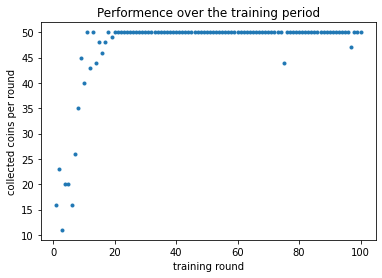

In [8]:
plt.plot(rounds, collected_coins, '.')
plt.title("Performence over the training period")
plt.ylabel("collected coins per round")
plt.xlabel("training round")
plt.show()

In [27]:
allQs = np.load("Qtrain.npy")

In [36]:
def analyze_state (state):
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3"]

    plt.plot(rounds, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

for i in range(len(policy)):
    analyze_state(i)

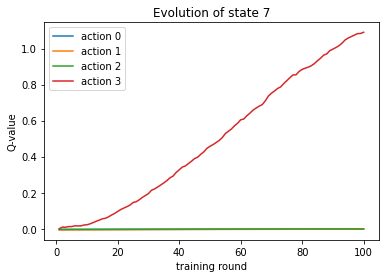

In [30]:
analyze_state(7)

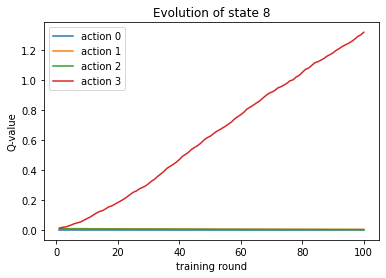

In [31]:
analyze_state(8)

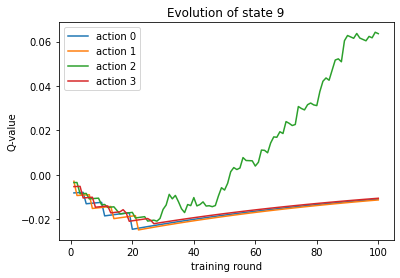

In [32]:
analyze_state(9)

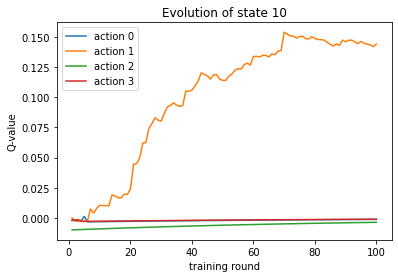

In [33]:
analyze_state(10)

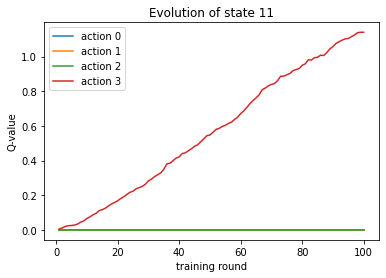

In [34]:
analyze_state(11)